In [ ]:
!pip install hiveplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 1.8 MB/s eta 0:00:00


1. **Beanplot**
- Используйте библиотеку `beanplot` для построения beanplot.
- Загрузите набор данных (например, `iris` из `seaborn`).
- Постройте beanplot для одного из количественных признаков, разделенных по
категориям.
- Поменяйте цвет диаграмм, выведите среднее значение на гарфике.

In [ ]:
!pip install beanplot

ERROR: Could not find a version that satisfies the requirement beanplot (from versions: none)
ERROR: No matching distribution found for beanplot


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
from beanplot import beanplot

beanplot(data=iris, y='sepal_width', x='species')
plt.show()

ModuleNotFoundError: No module named 'beanplot'

библиотека beanplot не устанавливается в колаб, поэтому делаю через seaborn

<ipython-input-11-eb8d04fe34eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='species', y='sepal_width', data=iris,
<ipython-input-11-eb8d04fe34eb>:10: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='species', y='sepal_width', data=iris,


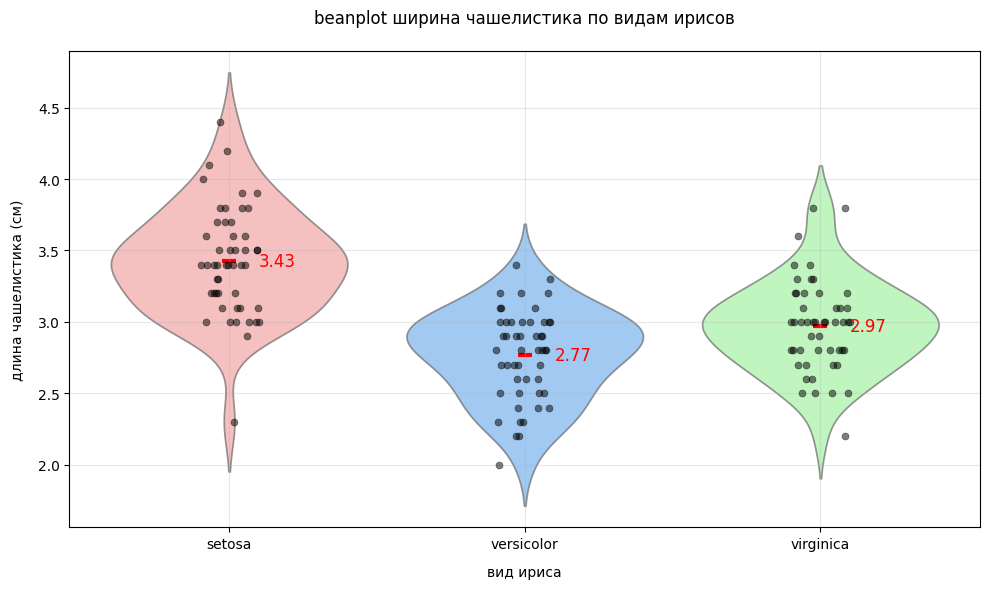

In [ ]:
plt.figure(figsize=(10, 6))

# аналог beanplot - violinplot + stripplot
ax = sns.violinplot(x='species', y='sepal_width', data=iris,
                   inner=None,
                   palette=['#FF9999', '#66B2FF', '#99FF99'],
                   alpha=0.7)

# точки данных
sns.stripplot(x='species', y='sepal_width', data=iris,
              color='black', alpha=0.5, jitter=True,
              size=5, edgecolor='gray', linewidth=0.5)

# средние значения
means = iris.groupby('species')['sepal_width'].mean()
for i, (species, mean_val) in enumerate(means.items()):
    plt.scatter(i, mean_val, color='red', s=100, marker='_', linewidth=3)
    plt.text(i+0.1, mean_val, f'{mean_val:.2f}',
             va='center', ha='left', color='red', fontsize=12)

plt.title('beanplot ширина чашелистика по видам ирисов', pad=20)
plt.xlabel('вид ириса', labelpad=10)
plt.ylabel('длина чашелистика (см)', labelpad=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

2. **Arc Plot**
 - Используйте библиотеку `networkx` для построения arc plot.
 - Создайте случайные данные и визуализируйте их с помощью arc plot, показывающего
взаимосвязи между несколькими переменными.
- Поменяйте в приведенном примере маркеры и размер полотна.

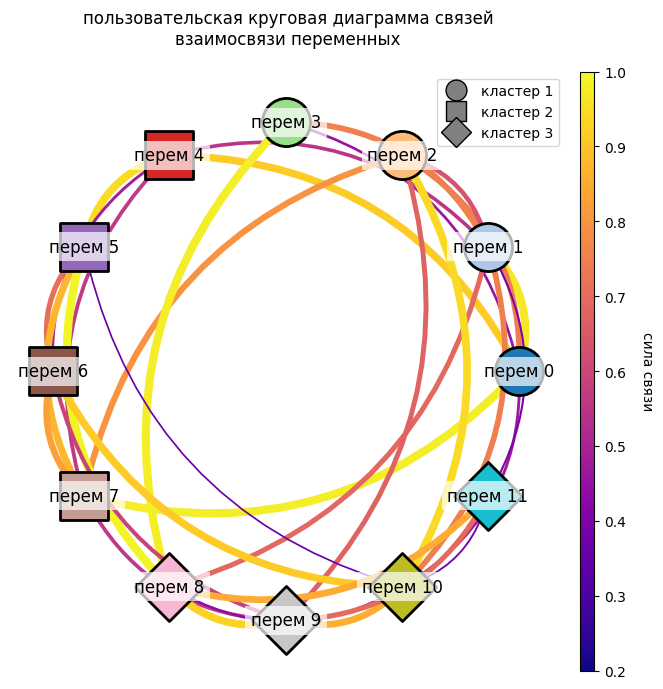

In [ ]:
import networkx as nx

# случайные данные с кластерами
np.random.seed(42)
num_nodes = 12
nodes = [f"перем {i}" for i in range(num_nodes)]

G = nx.Graph()
G.add_nodes_from(nodes)

# добавляем рёбра с большей вероятностью внутри кластеров
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        # кластер 1: переменные 0-3, кластер 2: 4-7, кластер 3: 8-11
        same_cluster = (i//4 == j//4)
        prob = 0.8 if same_cluster else 0.2
        if np.random.random() < prob:
            weight = np.random.rand() * 0.8 + 0.2  # веса от 0.2 до 1.0
            G.add_edge(nodes[i], nodes[j], weight=weight)

pos = nx.circular_layout(G)
fig, ax = plt.subplots(figsize=(7, 7))

node_shapes = ['o', 's', 'D']  # круг, квадрат, ромб
for i, node in enumerate(nodes):
    shape = node_shapes[i//4]
    nx.draw_networkx_nodes(G, pos, nodelist=[node],
                         node_size=1200,
                         node_shape=shape,
                         node_color=plt.cm.tab20(i/num_nodes),
                         edgecolors='black',
                         linewidths=2,
                         ax=ax)

# изогнутые рёбра с разной толщиной и цветом
edge_weights = [G.edges[e]['weight'] for e in G.edges()]
edge_colors = [plt.cm.plasma(w) for w in edge_weights]

for i, edge in enumerate(G.edges()):
    source, target = edge
    rad = 0.3 if (nodes.index(target) - nodes.index(source)) < num_nodes//2 else -0.3
    nx.draw_networkx_edges(
        G, pos, edgelist=[edge],
        width=edge_weights[i]*6,
        edge_color=[edge_colors[i]],
        connectionstyle=f'arc3,rad={rad}',
        arrows=True,
        min_source_margin=15,
        min_target_margin=15,
        ax=ax
    )

# подписи
nx.draw_networkx_labels(G, pos, font_size=12,
                       bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                       ax=ax)

# легенда для форм узлов
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='кластер 1',
              markerfacecolor='grey', markersize=15, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='s', color='w', label='кластер 2',
              markerfacecolor='grey', markersize=15, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='D', color='w', label='кластер 3',
              markerfacecolor='grey', markersize=15, markeredgecolor='black')
]
ax.legend(handles=legend_elements, loc='upper right')

# цветовая шкала для весов рёбер
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=0.2, vmax=1.0))
sm.set_array([])
cbar = plt.colorbar(sm, pad=0.02, aspect=40, ax=ax)
cbar.set_label('сила связи', rotation=270, labelpad=20)

plt.title("пользовательская круговая диаграмма связей\nвзаимосвязи переменных", pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

3. **Parallel Coordinate Graph**
 - Используйте библиотеку `pandas` и `matplotlib` для построения параллельных
координат.
 - Загрузите набор данных (например, `wine` из `sklearn.datasets`).
 - Постройте график параллельных координат для нескольких признаков.
- Поменяйте размер полотна, сделайте читаемыми категории.

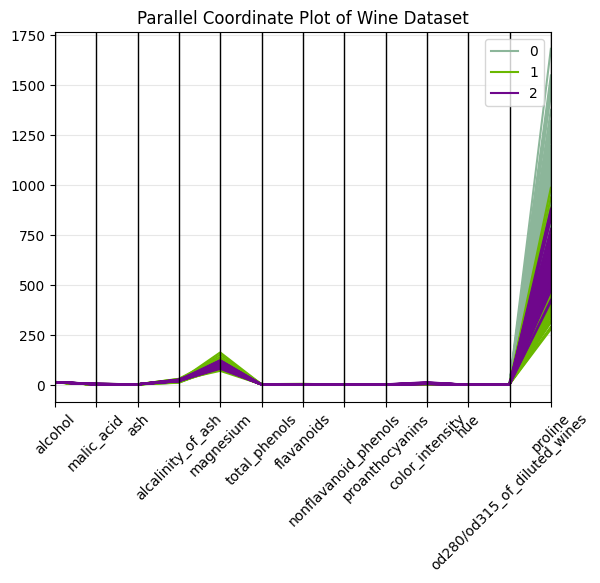

In [ ]:
from pandas.plotting import parallel_coordinates
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

parallel_coordinates(df, 'target')
plt.title('Parallel Coordinate Plot of Wine Dataset')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()

<ipython-input-23-1b5a59e0328c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].map({0: 'Class 0', 1: 'Class 1', 2: 'Class 2'})


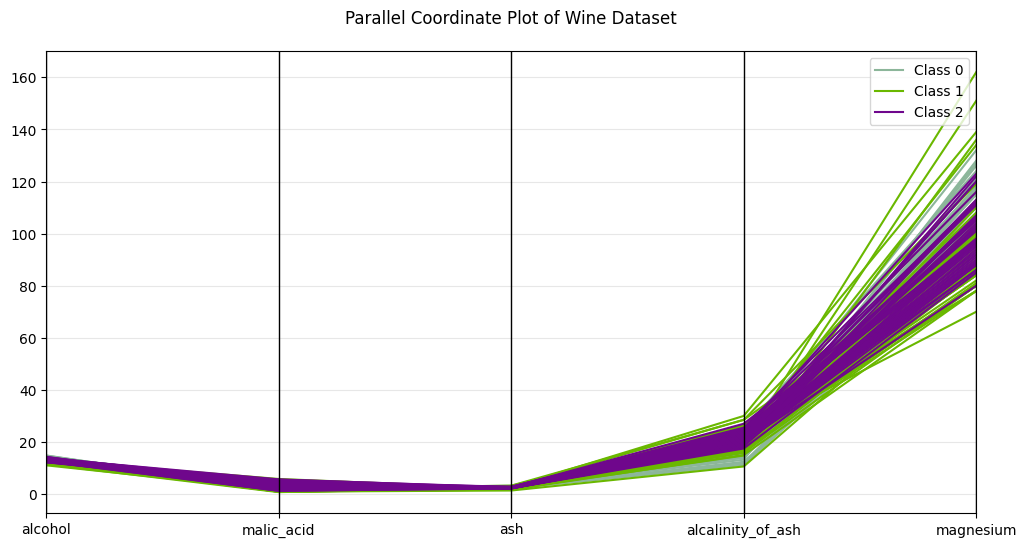

In [ ]:
# выбираю подмножества признаков и преобразовываю категории
features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']
df = df[features + ['target']]
df['target'] = df['target'].map({0: 'Class 0', 1: 'Class 1', 2: 'Class 2'})

plt.figure(figsize=(12, 6))
parallel_coordinates(df, 'target')
plt.title('Parallel Coordinate Plot of Wine Dataset', pad=20)
plt.grid(alpha=0.3)
plt.show()

4. **Hive Plot**
 - Используйте библиотеку `hiveplot` для построения hive plot.
 - Создайте случайные данные и визуализируйте их с помощью hive plot, показывающего
взаимосвязи между переменными.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from hiveplot import HivePlot

data = np.random.rand(10, 3)

hp = HivePlot()
hp.add_node(data)
hp.draw()
plt.title('Hive Plot Example')
plt.show()

TypeError: HivePlot.__init__() missing 3 required positional arguments: 'nodes', 'edges', and 'node_colormap'

постоянно выводит ошибку, сделаю другим способом

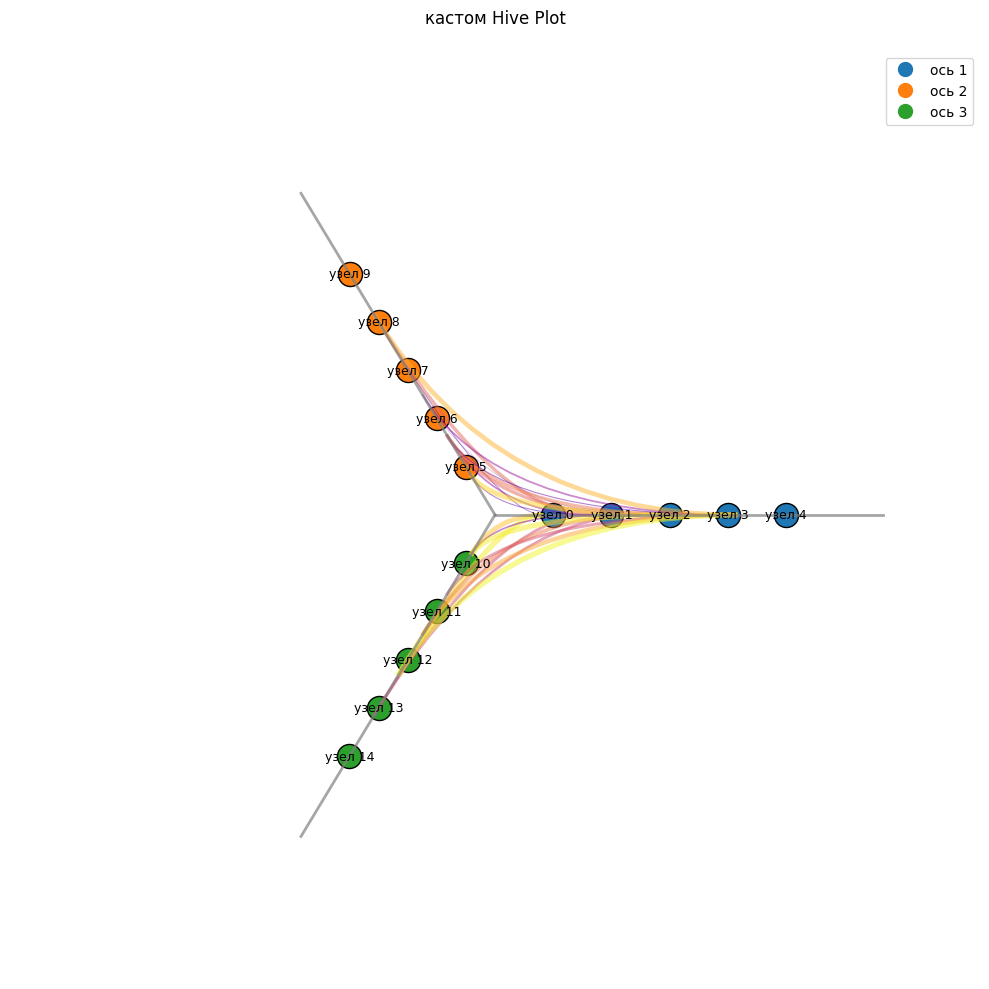

In [ ]:
from matplotlib.path import Path
import matplotlib.patches as patches

np.random.seed(42)
G = nx.Graph()

# 15 узлов, распределенных по 3 осям (категориям)
nodes = [f"узел {i}" for i in range(15)]
G.add_nodes_from(nodes)

# узлы по 3 осям
categories = {
    'ось 1': nodes[:5],
    'ось 2': nodes[5:10],
    'ось 3': nodes[10:15]
}

#случайные связи между узлами разных осей
for i in range(5):
    for j in range(5, 15):
        if np.random.random() < 0.3:
            G.add_edge(nodes[i], nodes[j], weight=np.random.rand())

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.axis('off')
plt.title('кастом Hive Plot', pad=20)

def draw_axis(angle, length=1.2, color='gray', lw=2): # рисует ось
    x = length * np.cos(angle)
    y = length * np.sin(angle)
    ax.plot([0, x], [0, y], color=color, lw=lw, alpha=0.7)
    return x, y

# 3 оси под углами 0, 120 и 240
angles = [0, 2*np.pi/3, 4*np.pi/3]
axis_positions = {}
for i, (category, angle) in enumerate(zip(categories.keys(), angles)):
    end_x, end_y = draw_axis(angle)
    axis_positions[category] = (angle, end_x, end_y)

    nodes_in_category = categories[category]
    for j, node in enumerate(nodes_in_category):
        ratio = (j + 1) / (len(nodes_in_category) + 1)
        x = ratio * end_x * 0.9
        y = ratio * end_y * 0.9

        # рисуем узел
        ax.scatter(x, y, s=300, color=plt.cm.tab10(i), edgecolor='black', lw=1)
        ax.text(x, y, node, ha='center', va='center', fontsize=9)

# рисование кривой связи
def draw_curve(start_angle, end_angle, start_r, end_r, color='blue', alpha=0.5, lw=2):
    verts = [
        (start_r * np.cos(start_angle), start_r * np.sin(start_angle)),  # начальная точка
        (0, 0),  # контрольная точка 1 (центр)
        (end_r * np.cos(end_angle), end_r * np.sin(end_angle))   # конечная точка
    ]

    codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', edgecolor=color, lw=lw, alpha=alpha)
    ax.add_patch(patch)

# связи между узлами
for edge in G.edges():
    node1, node2 = edge
    for cat1 in categories:
        if node1 in categories[cat1]:
            angle1 = axis_positions[cat1][0]
            r1 = (nodes.index(node1) % 5 + 1) / 6 * 0.9
            break
    for cat2 in categories:
        if node2 in categories[cat2]:
            angle2 = axis_positions[cat2][0]
            r2 = (nodes.index(node2) % 5 + 1) / 6 * 0.9
            break

    draw_curve(angle1, angle2, r1, r2,
               color=plt.cm.plasma(G.edges[edge]['weight']),
               lw=G.edges[edge]['weight']*4)

# легенда для осей
for i, category in enumerate(categories):
    ax.plot([], [], color=plt.cm.tab10(i), marker='o', linestyle='None',
            markersize=10, label=category)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

5. **Candlesticks Chart**
 - Используйте библиотеку `plotly` для построения графика свечей (candlestick chart).
 - Загрузите данные о ценах акций (например, из Yahoo Finance) и постройте график
свечей.

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
print(df.columns)

Index(['Date', 'AAPL.Open', 'AAPL.High', 'AAPL.Low', 'AAPL.Close',
       'AAPL.Volume', 'AAPL.Adjusted', 'dn', 'mavg', 'up', 'direction'],
      dtype='object')


In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['AAPL.Open'],
                                     high=df['AAPL.High'],
                                     low=df['AAPL.Low'],
                                     close=df['AAPL.Close'])])
fig.update_layout(title='Candlestick Chart for AAPL')
fig.show()

6. **Chernoff Faces**
 - Используйте библиотеку `matplotlib` для построения Chernoff faces.
 - Создайте случайные данные и визуализируйте их с помощью Chernoff faces, чтобы
показать многомерные данные. Исправьте код в приведенном примере.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_chernoff_face(data):
    fig, ax = plt.subplots()
    for i in range(data.shape[0]):
      ax.add_patch(plt.title((i, 0), 0.5, color='blue', alpha=0.5))
    plt.x(-1, data.shape[0])
    plt.y(-1, 1)
    plt.title('Chernoff faces Example')
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse, Arc

def draw_chernoff_face(data):
    fig, ax = plt.subplots(figsize=(10, 6))

    for i in range(data.shape[0]):
        face_width = 0.5 + data[i, 0] * 0.3
        face_height = 0.6 + data[i, 1] * 0.3
        eye_size = 0.1 + data[i, 2] * 0.05
        mouth_width = 0.3 + data[i, 3] * 0.2
        mouth_height = 0.1 + data[i, 4] * 0.05

        face = Ellipse((i, 0), face_width, face_height, fc='yellow', alpha=0.5)
        ax.add_patch(face)

        left_eye = Circle((i - 0.15, 0.1), eye_size, fc='black')
        right_eye = Circle((i + 0.15, 0.1), eye_size, fc='black')
        ax.add_patch(left_eye)
        ax.add_patch(right_eye)

        mouth = Arc((i, -0.1), mouth_width, mouth_height,
                   theta1=180, theta2=0, color='red')
        ax.add_patch(mouth)

    ax.set_xlim(-1, data.shape[0])
    ax.set_ylim(-1, 1)
    plt.title('Chernoff Faces')
    plt.axis('off')
    plt.show()

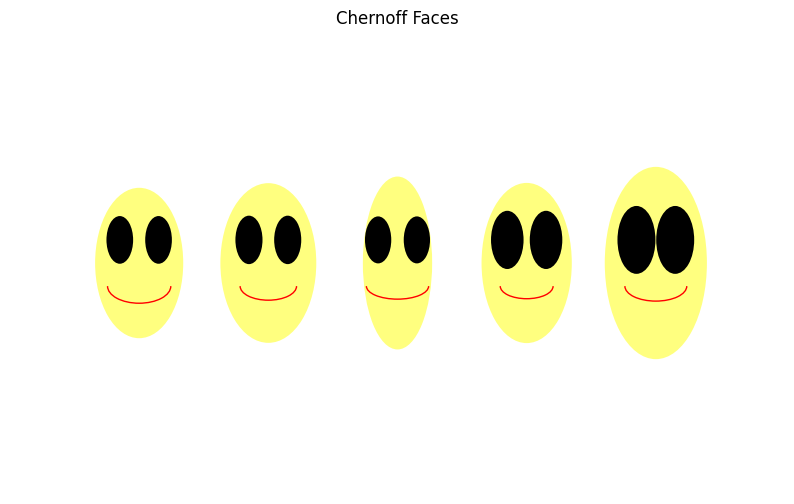

In [ ]:
random_data = np.random.rand(5, 5)
draw_chernoff_face(random_data)

7. **Point and Figure**
- Построить графики Point and Figure в Python, используя библиотеки `pandas` и
`matplotlib.
- Видоизменить представленный пример.
- Проинтерпретировать результат.

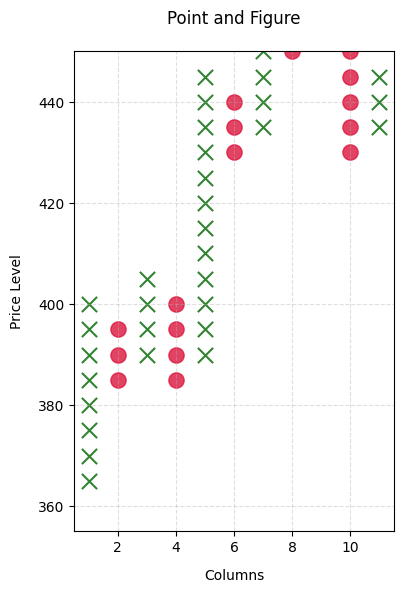

In [ ]:
import matplotlib.pyplot as plt

BOX = 5
START = 365
changes = [8, -3, 4, -4, 12, -3, 7, -3, 5, -9, 3]

fig = plt.figure(figsize=(4, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

def sign(val):
    return val / abs(val)

symbol = {-1: 'o',
          1: 'x'}

chgStart = START
for ichg, chg in enumerate(changes):
    x = [ichg+1] * abs(chg)
    y = [chgStart + i * BOX * sign(chg) for i in range(abs(chg))]
    chgStart += BOX * sign(chg) * (abs(chg)-2)
    ax.scatter(x, y,
              marker=symbol[sign(chg)],
              s=120,
              color='darkgreen' if sign(chg) == 1 else 'crimson',
              alpha=0.8)

ax.set_xlim(0.5, len(changes)+0.5)
ax.set_ylim(START - BOX*2, chgStart + BOX*2)

plt.grid(True, linestyle='--', alpha=0.4)

plt.title('Point and Figure', pad=20)
plt.xlabel('Columns', labelpad=10)
plt.ylabel('Price Level', labelpad=10)

plt.show()

8. **Sankey**
- Построить график Sankey в Python, используя библиотеки `pandas` и `matplotlib.
- Поменять велечину исходящих и входящих данных.
- Проинтерпретировать результат.


In [ ]:
import plotly.graph_objects as go

labels = ["Input A", "Input B", "Output A", "Output B", "Output C"]
source = [0, 1, 0, 1, 0]
target = [2, 2, 3, 4, 4]
value = [8, 4, 2, 8, 4]

fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels,
    ),
    link=dict(
      source=source,
      target=target,
      value=value,
    ))])

fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()